In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/sanketsingh/scikit_learn_data


In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv['data'].shape

(400, 4096)

In [7]:
oliv['images'].shape

(400, 64, 64)

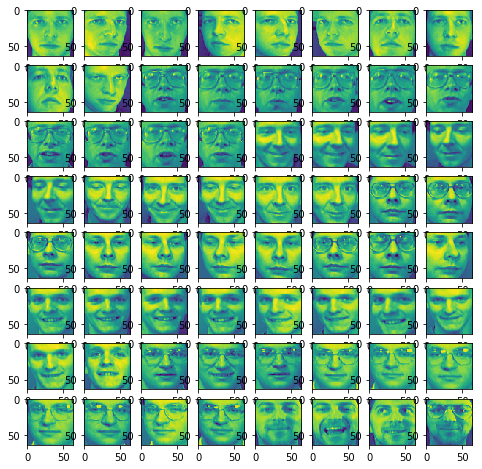

In [9]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(oliv.images[i])
plt.show()

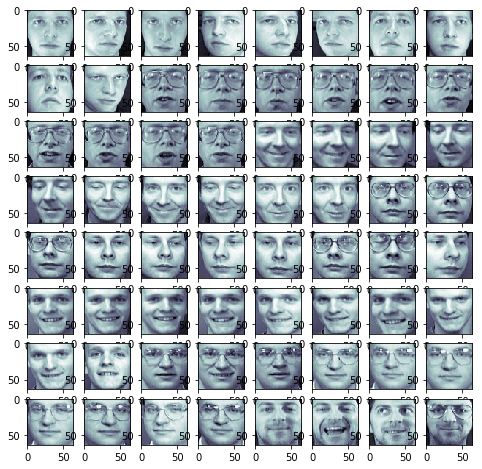

In [10]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [11]:
x = oliv.data
y = oliv.target

In [12]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_

array([[-0.00419106, -0.0071095 , -0.00933609, ...,  0.00018519,
         0.00337969,  0.00318829],
       [-0.02859127, -0.03328845, -0.03784651, ...,  0.0296278 ,
         0.02721296,  0.02488895],
       [ 0.001357  , -0.00032574, -0.00019799, ..., -0.01541376,
        -0.01370987, -0.0118835 ],
       ...,
       [ 0.00223501,  0.02056702,  0.01515927, ..., -0.01273588,
        -0.05849009, -0.07650309],
       [ 0.01714767,  0.02917707, -0.00942477, ...,  0.00159095,
         0.0124935 , -0.00815253],
       [-0.00174248,  0.01021132,  0.01638134, ..., -0.01190175,
        -0.01621584, -0.00526071]], dtype=float32)

In [14]:
pca.components_.shape

(400, 4096)

In [18]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k = k + 1
k

107

In [20]:
pca = PCA(n_components = k, whiten=True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 107)

In [21]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [22]:
x_approx_images = x_approx.reshape((400, 64, 64))

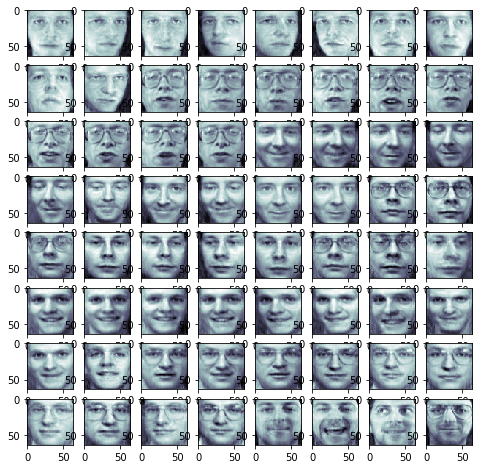

In [23]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()

In [24]:
eigenv = pca.components_
eigenv.shape

(107, 4096)

In [26]:
eigenfaces = eigenv.reshape((107, 64, 64))

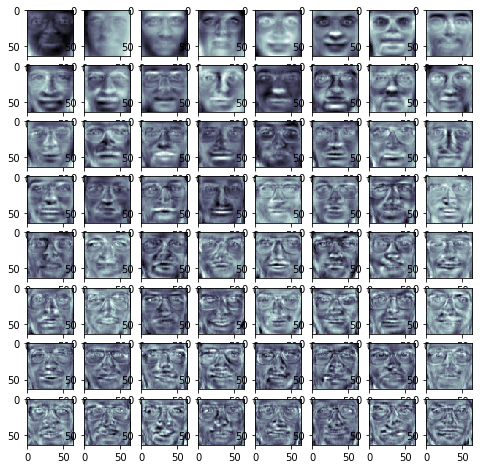

In [27]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(eigenfaces[i], cmap=plt.cm.bone)
plt.show()